In [12]:
#Recreational Areas Data Analysis

In [41]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import geopandas as gp
import shapely
import fiona

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [7]:
saved_style_state = matplotlib.rcParams.copy() 

In [8]:
#Getting data from file path
def getdata(filepath):
    if os.path.isfile(filepath):

        print("loading from file")
        print("done")
    else:
        print("Put ur file there")
    return(pd.read_csv(filepath, low_memory=False))

In [12]:
dfrec_data= getdata("park_info.csv")

loading from file
done


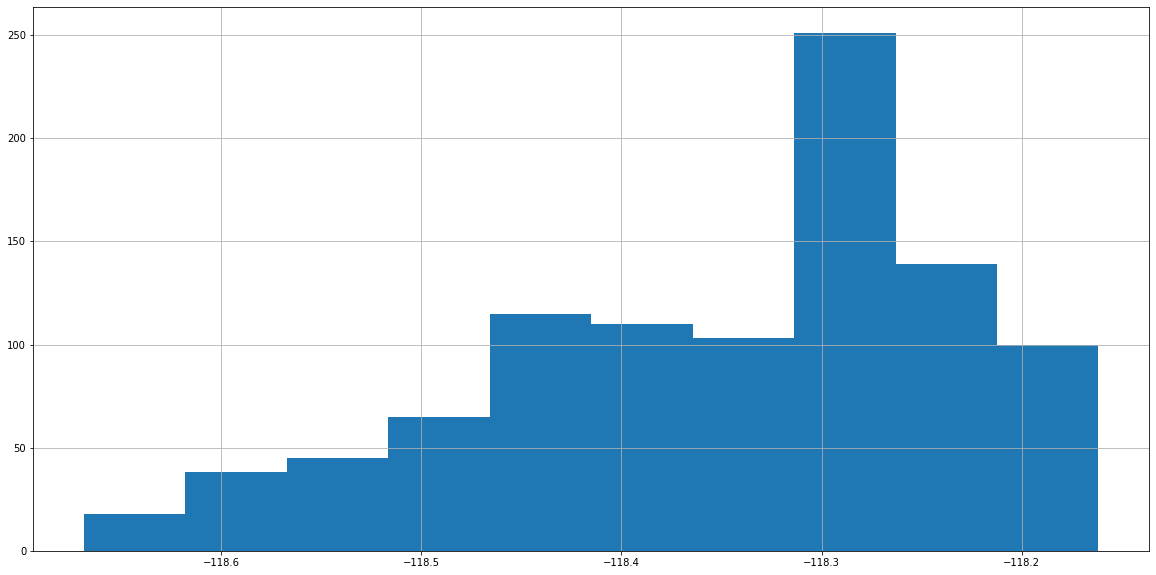

In [37]:
dfrec_data.GeoLong=dfrec_data.GeoLong.apply(lambda x:x if x < -118 else None)
dfrec_data.GeoLong.hist()

In [10]:
census_data = getdata("census.csv")

loading from file
done


In [13]:
dfrec_data.columns

Index(['LocationType', 'Location Name', 'StNumber', 'StNumberFraction',
       'StDirection', 'StName', 'StSuffix', 'StSuffixDirection', 'AddressType',
       'AddressTypeValue', 'CrossStDirection', 'CrossStName', 'CrossStSuffix',
       'CrossStSuffixDirection', 'City', 'State', 'Zip', 'Website', 'Phone',
       'CouncilDistrict', 'GeoLat', 'GeoLong'],
      dtype='object')

In [19]:
dfrec_data.head(1)

LocationType                    Location Name  StNumber StNumberFraction  \
0        Parks  La Mirada Park Acquisition Site    5401.0              NaN   

  StDirection     StName StSuffix StSuffixDirection AddressType  \
0           W  La Mirada      Ave               NaN         NaN   

   AddressTypeValue  ...  CrossStSuffix CrossStSuffixDirection  \
0               NaN  ...            NaN                    NaN   

                                         City  State    Zip Website  \
0  Los Angeles, CA 90029\n(34.0942, -118.307)     CA  90029     NaN   

            Phone CouncilDistrict     GeoLat     GeoLong  
0  (310) 548-7675              13  34.094208 -118.306999  

[1 rows x 22 columns]

In [20]:
row_one = dfrec_data.iloc[1]
print (row_one)

LocationType                                               Gardens
Location Name                                              Drew St
StNumber                                                      3304
StNumberFraction                                               NaN
StDirection                                                      N
StName                                                        Drew
StSuffix                                                        St
StSuffixDirection                                              NaN
AddressType                                                    NaN
AddressTypeValue                                               NaN
CrossStDirection                                               NaN
CrossStName                                                    NaN
CrossStSuffix                                                  NaN
CrossStSuffixDirection                                         NaN
City                      Los Angeles, CA 90065\n(34.12, -118.

type = park_data["LocationType"].value_counts()
type[type < 500].plot(kind="bar")

In [21]:
#Basic plots

Parks                                 387
Recreation Centers                    156
Public Computer Centers                76
Outdoor Fitness Equipment              67
Tennis Courts                          67
Senior Centers                         34
Swimming Pools - Summer                34
Universally Accessible Playgrounds     33
Skate Parks                            23
Swimming Pools - Year Round            17
Golf Courses                           15
Museums                                15
Hiking Trails                          14
Gardens                                10
Dog Parks                               9
Lakes                                   7
Free Wi-Fi Hot Spots                    6
Camps                                   4
Equestrian Centers                      4
Rental Facilities                       3
Theatre                                 2
Beaches                                 2
Open Space                              1
Name: LocationType, dtype: int64


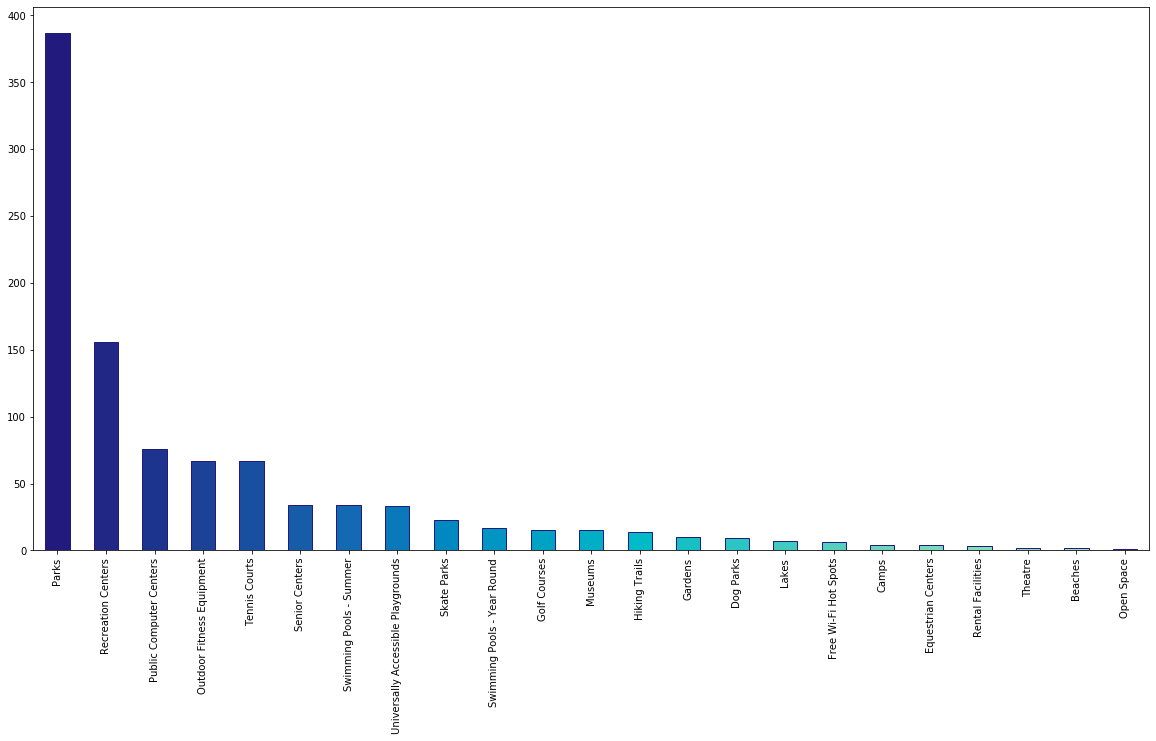

In [79]:
Typecounts = dfrec_data["LocationType"].value_counts()
Typecounts[Typecounts < 5000].plot(kind="bar",color=['#221A7C','#202785','#1D348E','#1B4297', '#184FA0', '#165CA9'  , '#1369B2', '#0979B9',"#0089c0", '#0095C2', '#00A2C4', '#00AEC5', \
         '#00BAC7', '#16C0C5','#2BC5C3', '#41CBC0', '#56D0BE', '#6CD6BC', '#77DABB',  '#83DEBA', '#8EE1B8',  '#9AE5B7', \
          '#A5E9B6', '#B0EDB5', '#BCF0B3', '#C7F4B2', '#CCF5B4', '#D1F7B6', '#DCFAB9', '#E6FCBD', '#F0FFC0'], edgecolor = "#221a7c")

print(Typecounts)

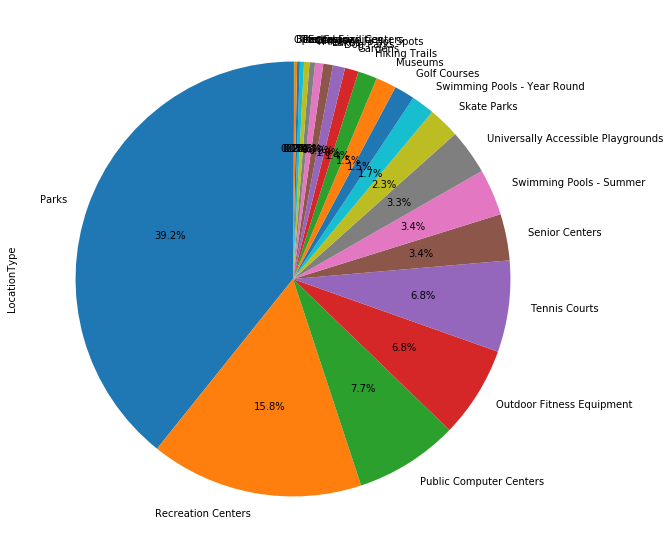

In [43]:
Locationtype = rec_data["LocationType"].value_counts()
Locationtype[Locationtype < 5000].plot(kind="pie",startangle=90,autopct='%1.1f%%')


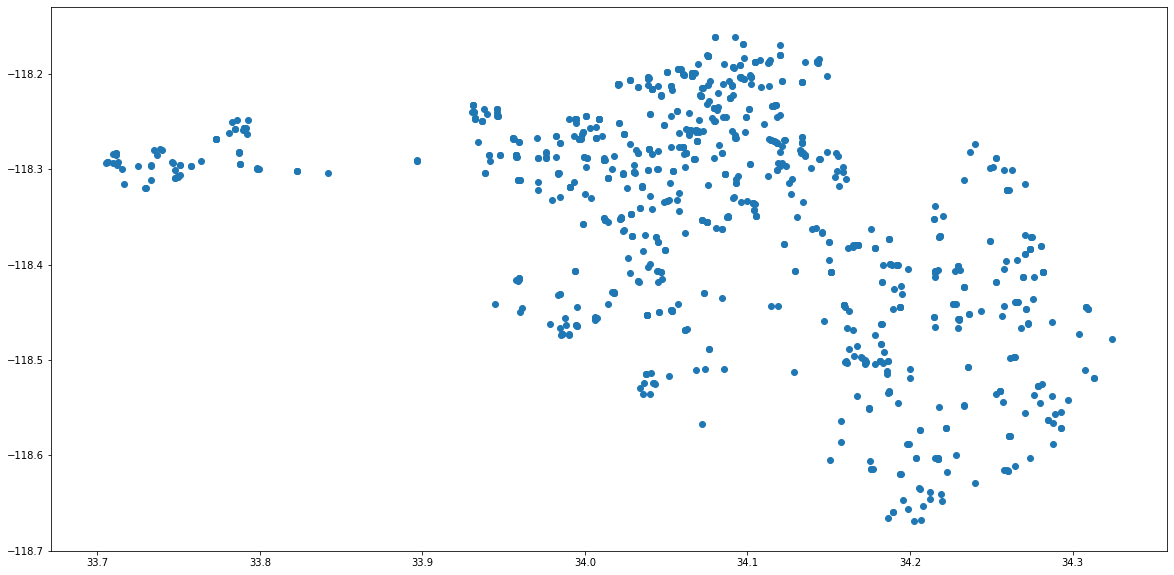

In [38]:
#mapping

plt.scatter(dfrec_data.GeoLat,dfrec_data.GeoLong)

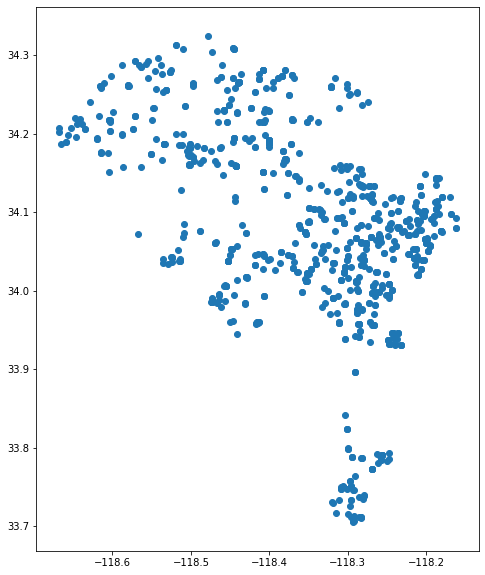

In [53]:
#right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)

#dfrec_data['geometry'] = dfrec_data.apply(lambda row: shapely.geometry.point.Point(row.GeoLat, row.GeoLong),axis = 1)

gdf = gp.GeoDataFrame(dfrec_data, geometry=gp.points_from_xy(dfrec_data.GeoLong, dfrec_data.GeoLat))
gdf.plot()


In [85]:
burbs = gp.GeoDataFrame.from_file("LA_County_City_Boundaries-shp (1)/LA_County_City_Boundaries.shp")
print(burbs)
burbs.head(2)
burbs.plot()

DriverError: LA_County_City_Boundaries-shp (1)/LA_County_City_Boundaries.shp.shp: No such file or directory

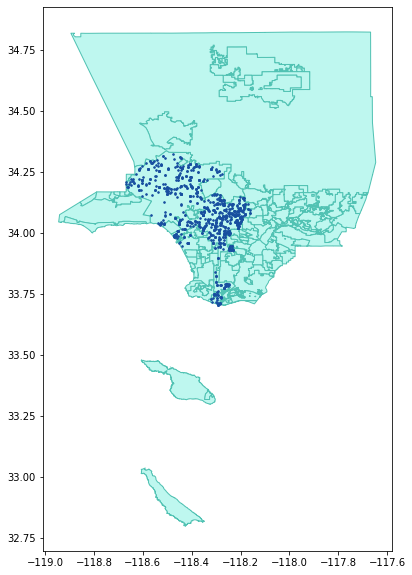

In [84]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

burbs.plot(ax=ax, color = "#bef7ef",edgecolor='#51c2b3')
gdf.plot(ax=ax, color='#184FA0', marker=".", markersize=10)


#for idx, row in gdf.iterrows():

 #   plt.annotate(s=row["Location Name"], 
 #                xy=[row.geometry.x,row.geometry.y],
 #                horizontalalignment='center')
#plt.title("Some pretty dodgy suburb names on a map");
#plt.show()
